In [1]:
!pip install tensorflow

  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.8.0
    Uninstalling typing_extensions-4.8.0:
      Successfully uninstalled typing_extensions-4.8.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.8.2 requires tensorflow<2.9,>=2.8.0; platform_machine != "arm64" or platform_system != "Darwin", but you have tensorflow 2.5.0 which is incompatible.
async-lru 2.0.4 requires typing-extensions>=4.0.0; python_version < "3.11", but you have typing-extensions 3.7.4.3 which is incompatible.
You should consider upgrading via the 'c:\python\python.exe -m pip install --upgrade pip' command.


In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [3]:
mnist =tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
#features as 0,1... in intensity   

x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

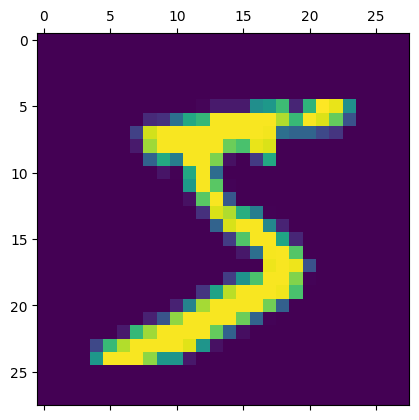

In [9]:
plt.matshow(x_train[0])

In [10]:
#normalize the data...helps to scale up the pixel intensity in 0 & 1...helps to speed up the training

x_train = x_train/ 255
x_test = x_test/ 255

In [11]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
model =  keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #INPUT
    keras.layers.Dense(128, activation='relu'), #
    keras.layers.Dense(10, activation='softmax') #OUPUT LAYER
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer="sgd",
loss="sparse_categorical_crossentropy",
metrics=['accuracy'])


In [15]:
history = model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6561 - accuracy: 0.8357 - val_loss: 0.3549 - val_accuracy: 0.9036
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3358 - accuracy: 0.9063 - val_loss: 0.2919 - val_accuracy: 0.9178
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2869 - accuracy: 0.9198 - val_loss: 0.2574 - val_accuracy: 0.9308
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2557 - accuracy: 0.9287 - val_loss: 0.2343 - val_accuracy: 0.9336
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2320 - accuracy: 0.9353 - val_loss: 0.2167 - val_accuracy: 0.9400
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2128 - accuracy: 0.9409 - val_loss: 0.2017 - val_accuracy: 0.9438
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1969 - accuracy: 0.9455 - val_loss: 0.1881 - val_accuracy:

In [16]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.8f" %test_loss)
print("Acc=%.8f" %test_acc)

313/313 [==============================] - 0s 768us/step - loss: 0.1613 - accuracy: 0.9550
Loss=0.16134425
Acc=0.95499998


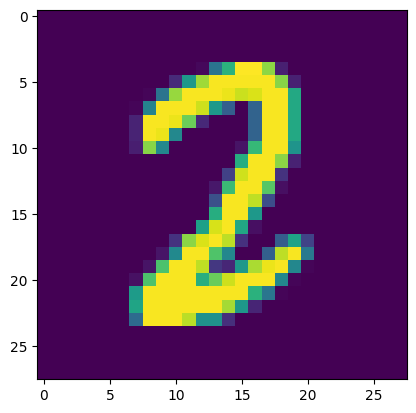

In [17]:
n= random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

value is = 2


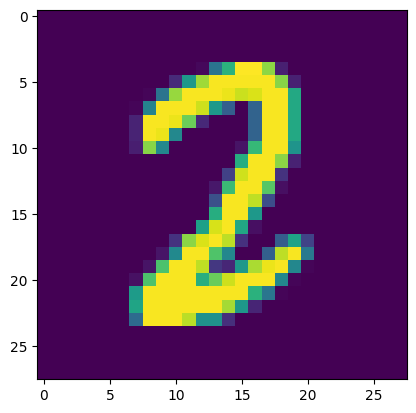

In [18]:
predicted_value=model.predict(x_test)
print("value is = %d" %np.argmax(predicted_value[n]) )
plt.imshow(x_test[n])
plt.show()

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

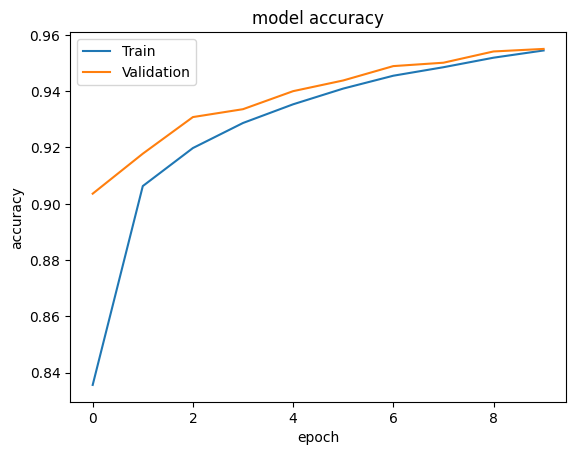

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

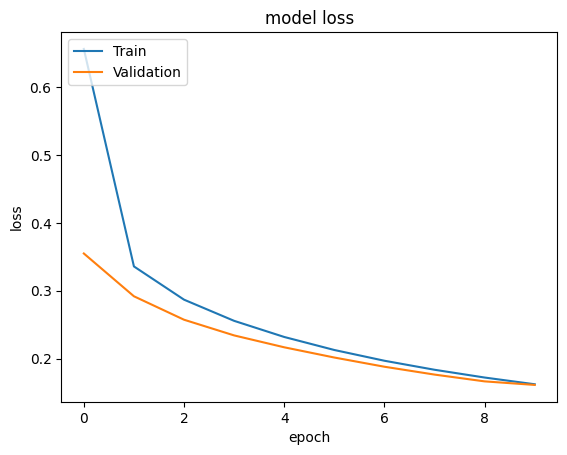

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()